**Pima Indians Diabetes Database**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. 

1. Pregnancies	- Number of times pregnant
2. Glucose	- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure - Diastolic blood pressure (mm Hg) (lower number in a blood pressure reading, representing the pressure in the arteries when the heart is at rest between beats)
4. SkinThickness - Triceps skin fold thickness (mm)
5. Insulin	- 2-Hour serum insulin (mu U/ml)
6. BMI	- Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction - Diabetes pedigree function (scores the probability of diabetes based on family history)
8. Age	- Age (years)
9. Outcome variable 1 is Yes (Diabetic), 0 is No (Healthy).

In [2]:
import pandas as pd
import numpy as np

In [3]:
pima_data = pd.read_csv("Task 2_Pima Indians diabetes database.csv")
pima_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**UNDERSTANDING THE DATA**

In [5]:
pima_data.shape

(768, 9)

In [6]:
pima_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
pima_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
pima_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Creating a copy of the data with 0 values replaced with NaN
pima_data2 = pima_data.copy(deep = True)
pima_data2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = pima_data2[['Glucose','BloodPressure','SkinThickness',
                                                                                      'Insulin','BMI']].replace(0,np.NaN)

In [10]:
pima_data2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
#Skewness of all parameters
pima_data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

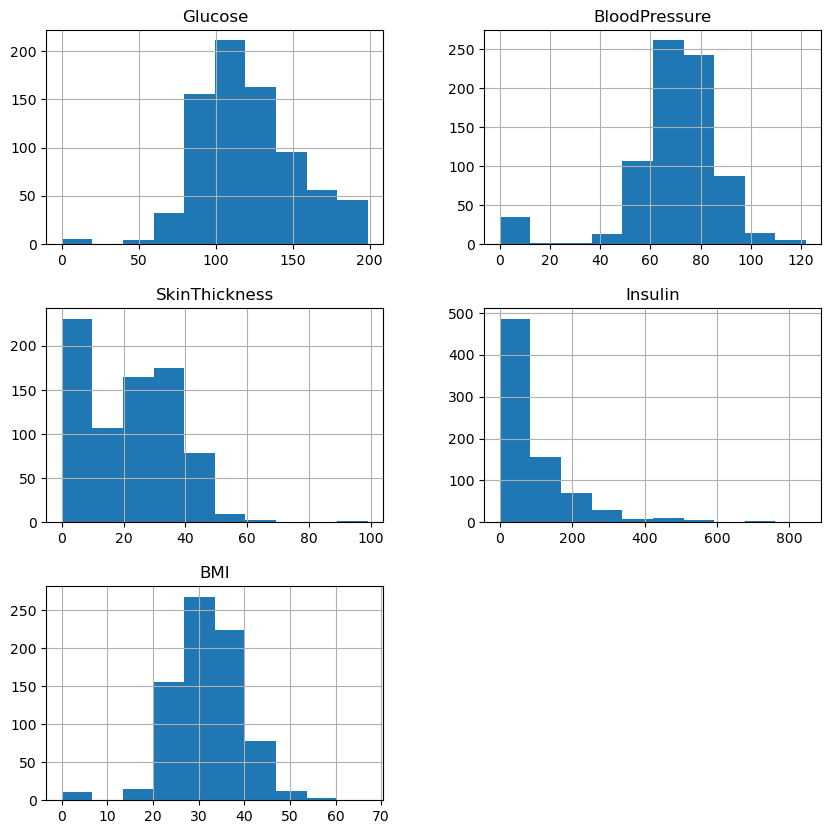

In [12]:
#Checking the original distribution with 0 values
distribution_plot_original = pima_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize = (10,10))

In [13]:
#Skewness of columns of our interest
pima_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].skew()

Glucose          0.173754
BloodPressure   -1.843608
SkinThickness    0.109372
Insulin          2.272251
BMI             -0.428982
dtype: float64

**For Imputing**
1. When the data is normally distributed use Mean
2. When the data is skewed or has outliers use	Median

When data is skewed, it contains extreme outliers that pull the mean away from the bulk of the data

Based on the skewed values:
1. Glucose - nearly symmetric - Mean
2. BloodPressure - Left skewed - Median
3. SkinThickness - nearly symmetric - Mean
4. Insulin - Right skewed - Median
5. BMI - Left skewed - Median




In [15]:
#Imputing the Nan Values in pima_data2
pima_data2['Glucose'].fillna(pima_data2['Glucose'].mean(), inplace = True)
pima_data2['BloodPressure'].fillna(pima_data2['BloodPressure'].median(), inplace = True)
pima_data2['SkinThickness'].fillna(pima_data2['SkinThickness'].mean(), inplace = True)
pima_data2['Insulin'].fillna(pima_data2['Insulin'].median(), inplace = True)
pima_data2['BMI'].fillna(pima_data2['BMI'].median(), inplace = True)

C:\Users\koush\AppData\Local\Temp\ipykernel_14132\546387543.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pima_data2['Glucose'].fillna(pima_data2['Glucose'].mean(), inplace = True)
C:\Users\koush\AppData\Local\Temp\ipykernel_14132\546387543.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

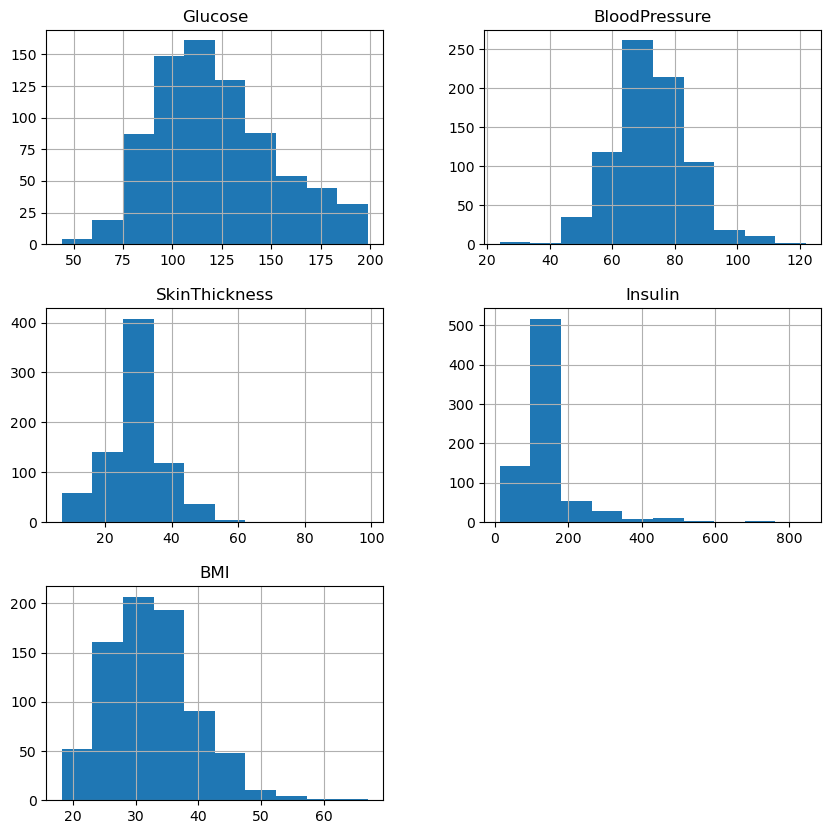

In [16]:
#Checking the new distribution with imputed values
distribution_plot_new = pima_data2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize = (10,10))

In [17]:
pima_data2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].skew()

Glucose          0.532719
BloodPressure    0.141885
SkinThickness    0.822173
Insulin          3.380019
BMI              0.599233
dtype: float64

In [18]:
#Skewness of the entire data
pima_data2.skew()

Pregnancies                 0.901674
Glucose                     0.532719
BloodPressure               0.141885
SkinThickness               0.822173
Insulin                     3.380019
BMI                         0.599233
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

**TRANSFORMATION is done to reduce the impact of outliers and make the data more symmetric.**

In [20]:
# Not including BloodPressure as its symmetric, Outcome since it is binary 

from sklearn.preprocessing import PowerTransformer

pima_data_transformed = pima_data2.copy()

# Strong positive skew → log1p
for col in ['Insulin', 'Age']:
    pima_data_transformed[col] = np.log1p(pima_data_transformed[col])  # log(1 + x) to avoid log(0)

# Mild skew → square root transform
for col in ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI']:
    pima_data_transformed[col] = np.sqrt(pima_data_transformed[col])

# Moderate skew → Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
pima_data_transformed['DiabetesPedigreeFunction'] = pt.fit_transform(
    pima_data_transformed[['DiabetesPedigreeFunction']])

In [21]:
pima_data_transformed.skew()

Pregnancies                -0.158938
Glucose                     0.250834
BloodPressure               0.141885
SkinThickness              -0.153380
Insulin                    -0.175078
BMI                         0.255761
DiabetesPedigreeFunction    0.142321
Age                         0.614664
Outcome                     0.635017
dtype: float64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

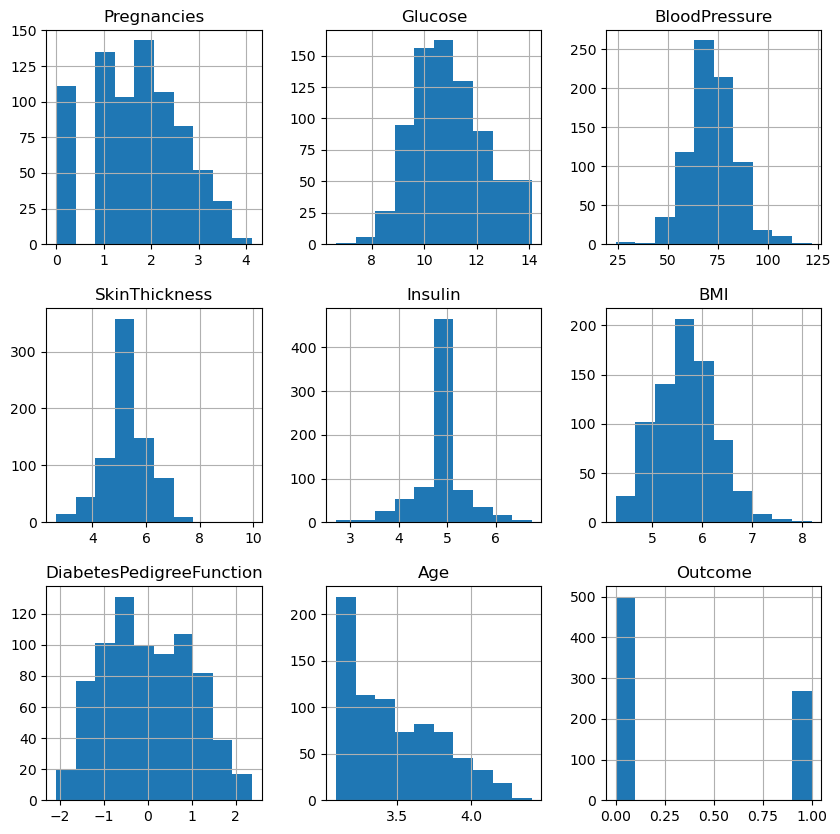

In [42]:
pima_data_transformed.hist(figsize = (10,10))

**SCALING** is done since the values are in different scales

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(pima_data_transformed.drop(columns=['Outcome'])) 

# Keep as DataFrame 
scaled_df = pd.DataFrame(scaled_data, columns=pima_data_transformed.drop(columns=['Outcome']).columns) 
scaled_df['Outcome'] = pima_data_transformed['Outcome'].values

In [50]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.765422,0.893731,-0.031990,0.703985,0.018491,0.219456,0.821764,1.437767,1
1,-0.706001,-1.266167,-0.528319,0.059459,0.018491,-0.851656,-0.168409,-0.050575,0
2,1.150094,1.892470,-0.693761,0.076729,0.018491,-1.405641,0.935284,0.047687,1
3,-0.706001,-1.108949,-0.528319,-0.655987,-0.552520,-0.611255,-1.298725,-1.247065,0
4,-1.721134,0.555869,-2.679076,0.703985,0.612171,1.507590,2.336680,0.143015,1


**MODELS**

**1. LOGISTIC REGRESSION**

Logistic regression is a statistical model used for predicting the probability of a binary outcome (two possible results, like yes/no, positive/negative, or spam/not spam). Since our Outcome is 0s and 1s, considering the logistic regression model.

In [53]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = scaled_df.drop(columns=['Outcome'])
y = scaled_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88, stratify=y)

In [55]:
# Create and train the logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)  # increased iterations to ensure convergence
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

In [57]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7272727272727273

Confusion Matrix:
 [[80 20]
 [22 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.62      0.59      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [62]:
pima_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Class weighting** is a technique used in machine learning to handle imbalanced datasets — where one class has more samples than the other.

In [66]:
new_model = LogisticRegression(class_weight='balanced', max_iter=1000)
new_model.fit(X_train, y_train)

# Predictions
y_pred_new = new_model.predict(X_test)

# Evaluation
print("New Accuracy:", accuracy_score(y_test, y_pred_new))
print("\nNew Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))
print("\nNew Classification Report:\n", classification_report(y_test, y_pred_new))

New Accuracy: 0.7207792207792207

New Confusion Matrix:
 [[71 29]
 [14 40]]

New Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       100
           1       0.58      0.74      0.65        54

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154



**2. KNN K-Nearest Neighbors**

In [74]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [76]:
## score that comes from testing on the same datapoints that were used for training 
max_train_score = max(train_scores) 
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score] 
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind)))) 

## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely 
max_test_score = max(test_scores) 
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score] 
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 100.0 % and k = [1]
Max test score 74.67532467532467 % and k = [7, 12]


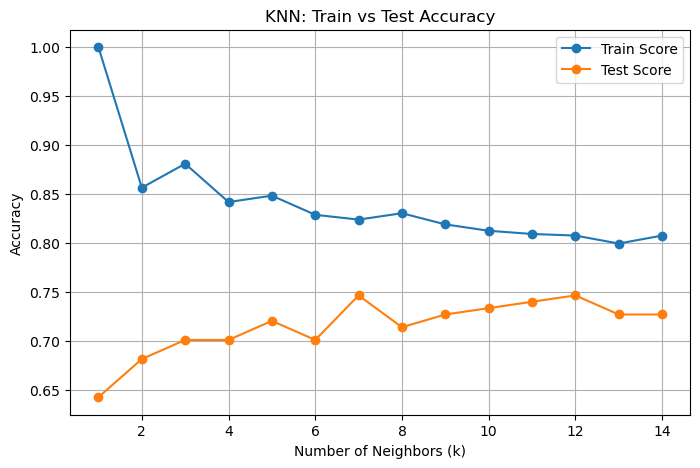

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1,15), train_scores, label='Train Score', marker='o')
plt.plot(range(1,15), test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN: Train vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(12)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7467532467532467

In [86]:
# Predict on test data
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optional: Detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[84 16]
 [23 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



**3. DECISION TREES**

In [90]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

#Predictions
y_pred_dt = dt.predict(X_test)

#Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

#Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

#Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6623376623376623
Confusion Matrix:
 [[73 27]
 [25 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74       100
           1       0.52      0.54      0.53        54

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.67      0.66      0.66       154



**COMPARING ALL THREE MODELS**

In [98]:
from sklearn.model_selection import GridSearchCV

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
evaluate_model(lr, X_train, X_test, y_train, y_test, "Logistic Regression")

# KNN (k=12)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
evaluate_model(knn, X_train, X_test, y_train, y_test, "KNN (k=12)")



# Tuned Decision Tree
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_dt.fit(X_train, y_train)

print("Best DT parameters:", grid_dt.best_params_)

best_dt = grid_dt.best_estimator_
evaluate_model(best_dt, X_train, X_test, y_train, y_test, "Tuned Decision Tree")

=== Logistic Regression ===
Accuracy: 0.7272727272727273
Confusion Matrix:
 [[80 20]
 [22 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.62      0.59      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



=== KNN (k=12) ===
Accuracy: 0.7467532467532467
Confusion Matrix:
 [[84 16]
 [23 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



Best DT parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
=== Tun

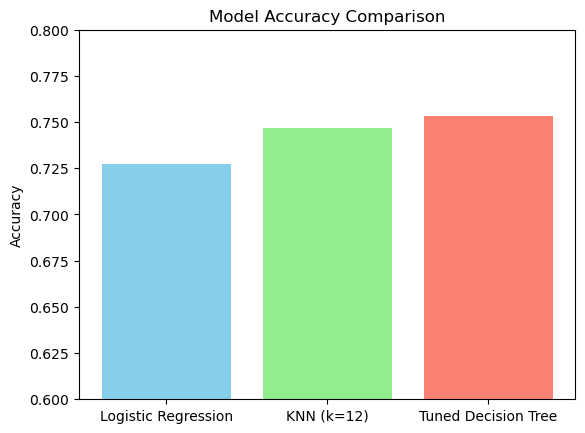

In [104]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN (k=12)', 'Tuned Decision Tree']
accuracies = [0.7272, 0.7467, 0.7532]

plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Accuracy")
plt.ylim(0.6, 0.8)
plt.title("Model Accuracy Comparison")
plt.show()

**OBSERVATIONS:**

1. Tuned Decision Tree edges out in accuracy, precision for class 1, and overall balance—without overfitting.
2. KNN and Tuned DT are very close.
3. Logistic Regression lags behind but still performs decently.